# Sobre a Empresa


A TopBank é uma grande empresa de serviços bancários. Ela atua principalmente nos países da Europa oferecendo produtos financeiros, desde contas bancárias até investimentos, passando por alguns tipos de seguros e produto de investimento.

O modelo de negócio da empresa é do tipo serviço, ou seja, ela comercializa serviços bancários para seus clientes através de agências físicas e um portal online. 

O principal produto da empresa é uma conta bancária, na qual o cliente pode depositar seu salário, fazer saques, depósitos e transferência para outras contas. Essa conta bancária não tem custo para o cliente e tem uma vigência de 12 meses, ou seja, o cliente precisa renovar o contrato dessa conta para continuar utilizando pelos próximos 12 meses.

Segundo o time de Analytics da TopBank, cada cliente que possui essa conta bancária retorna um valor monetário de 15% do valor do seu salário estimado, se esse for menor que a média e 20% se esse salário for maior que a média, durante o período vigente de sua conta. Esse valor é calculado anualmente. 



## Problema de Negócio

Nos últimos meses, o time de Analytics percebeu que a taxa de clientes cancelando suas contas e deixando o banco, atingiu números inéditos na empresa. Preocupados com o aumento dessa taxa, o time planejou um plano de ação para diminuir taxa de evasão de clientes.

Preocupados com a queda dessa métrica, o time de Analytics da TopBottom, contratou você como consultor de Data Science para criar um plano de ação, com o objetivo de reduzir a evasão de clientes, ou seja, impedir que o cliente cancele seu contrato e não o renove por mais 12 meses. Essa evasão, nas métricas de negócio, é conhecida como Churn.

## O Desafio

Como um Consultor de Ciência de Dados, você precisa criar um plano de ação para diminuir o número de clientes em churn e mostrar o retorno financeiro da sua solução.

Ao final da sua consultoria, você precisa entregar ao CEO da TopBottom um modelo em produção, que receberá uma base de clientes via API e retornará essa mesma base “scorada”, ou seja, um coluna à mais com a probabilidade de cada cliente entrar em churn.

Além disso, você precisará fornecer um relatório reportando a performance do seu modelo e o impacto financeiro da sua solução. Questões que o CEO e o time de Analytics gostariam de ver em seu relatório:

1 - Qual a taxa atual de Churn da TopBank?

2 - Qual a Performance do modelo em classificar os clientes como churns?

3 - Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?



# Dados

RowNumber: O número da coluna.

CustomerID: Identificador único do cliente.

Surname: Sobrenome do cliente.

CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.

Geography: O país onde o cliente reside.

Gender: O gênero do cliente.

Age: A idade do cliente.

Tenure: Número de anos que o cliente permaneceu ativo.

Balance: Valor monetário que o cliente tem em sua conta bancária.

NumOfProducts: O número de produtos comprado pelo cliente no banco.

HasCrCard: Indica se o cliente possui ou não cartão de crédito.

IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.

EstimateSalary: Estimativa do salário mensal do cliente.

Exited: Indica se o cliente está ou não em Churn.

# Modelo

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## dataset

In [4]:
raw_dataset = pd.read_csv("churn.csv")
raw_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
raw_dataset.shape

(10000, 14)

# Análise Exploratória dos dados

In [6]:
dataset = raw_dataset.drop(columns = ["RowNumber","CustomerId","Surname"])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.4 KB


In [7]:
dataset.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [8]:
dataset.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### Análise por país onde o cliente reside e por gênero

In [9]:
dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
churn = {0: 'Active_client', 
       1: "Churn"}

In [62]:
Geography_count = pd.crosstab(dataset.Geography, dataset.Exited)
Geography_count.rename(columns = churn, inplace=True)



In [12]:
Geography_count["Perc_Churn_%"] = (Geography_count.Churn/Geography_count.Active_client).round(4)*100
Geography_count

Exited,Active_client,Churn,Perc_Churn_%
Geography,,,
France,4204,810,19.27
Germany,1695,814,48.02
Spain,2064,413,20.01


In [63]:
Gender_count = pd.crosstab(dataset.Gender, dataset.Exited)
Gender_count.rename(columns = churn, inplace=True)


In [14]:
Gender_count["Perc_Churn_%"] = (Gender_count.Churn/Gender_count.Active_client).round(4)*100
Gender_count

Exited,Active_client,Churn,Perc_Churn_%
Gender,,,
Female,3404,1139,33.46
Male,4559,898,19.70


## Respondendo algumas perguntas

### Média salarial

In [46]:
mean_salary = dataset["EstimatedSalary"].mean()
mean_salary

100090.2398809998

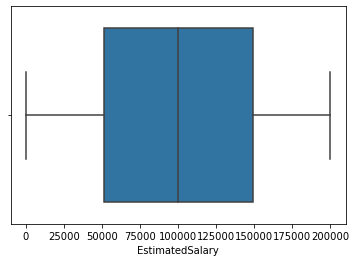

In [39]:
sns.boxplot(dataset.EstimatedSalary)

### Clientes com taxa anual de 15% do salário

In [82]:
client_15 = dataset.query("EstimatedSalary <= 100090.2398809998")
print("O número total de clientes com taxa de 15%% é  %.2f" %client_15.shape[0])

O número total de clientes com taxa de 15% é  4993.00


### Clientes com taxa anual de 20% do salário

In [61]:
client_20 = dataset.query("EstimatedSalary > 100090.2398809998")

print("O número total de clientes com taxa de 20%% é  %.2f" %client_20.shape[0])

O número total de clientes com taxa de 20% é  5007.00


### Lucro anual do banco com clientes ativos

In [83]:
lucro_anual = (client_15.query("Exited == 0")['EstimatedSalary'].sum().round(3)*(0.15)+ client_20.query("Exited == 0")['EstimatedSalary'].sum().round(3)*(0.20))

print("O lucro anual a partir das taxas de serviço é de", lucro_anual)

O lucro anual a partir das taxas de serviço é de 148765752.8655


### Prejuizo anual do banco com churn

In [84]:
prejuizo_anual = (client_15.query("Exited == 1")['EstimatedSalary'].sum().round(3)*(0.15)+ client_20.query("Exited == 1")['EstimatedSalary'].sum().round(3)*(0.20))

print("O prejuízo anual a partir das taxas de serviço é de", prejuizo_anual)

O prejuízo anual a partir das taxas de serviço é de 38846324.6335


# Dados Churn

In [52]:
Churn_client = dataset.query('Exited == "1"')
Churn_client.shape[0]

2037

Porcentagem de churn

In [64]:
perc_churn = (Churn_client.shape[0]/dataset.shape[0])*100

print("A porcentagem de Churn é de %.2f%% do total de clientes"%perc_churn)

A porcentagem de Churn é de 20.37% do total de clientes


## Análise de Histogramas por Features

Text(0.5, 1.0, 'Histogram of Churn by EstimatedSalary')

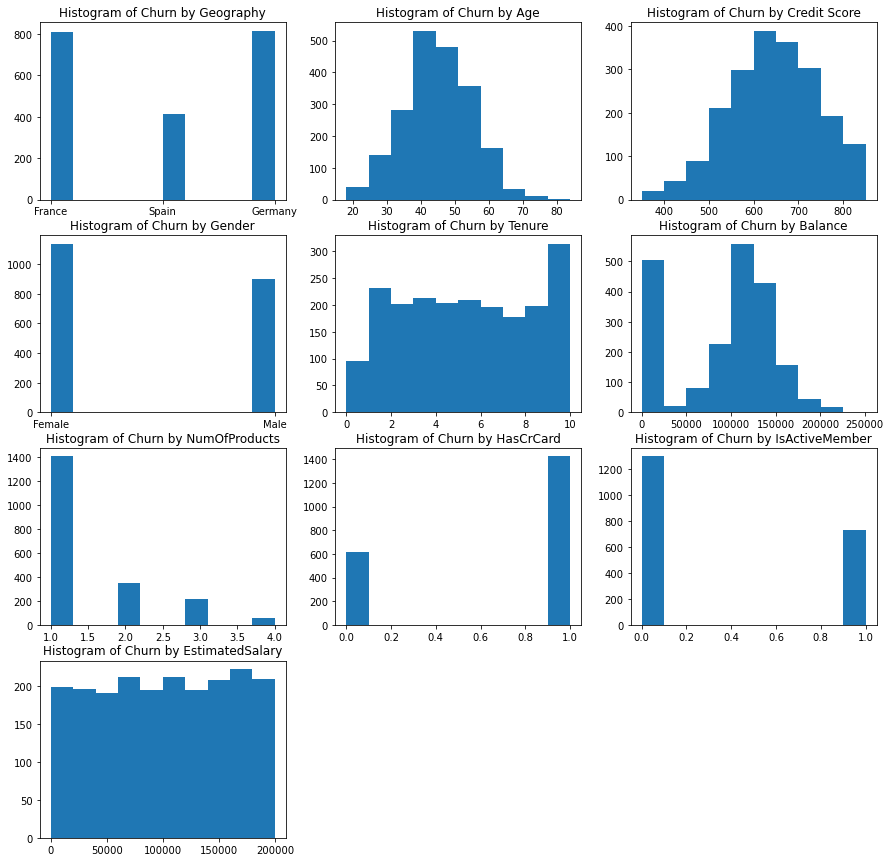

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.hist(Churn_client.Geography)
plt.title("Histogram of Churn by Geography")

plt.subplot(4,3,2)
plt.hist(Churn_client.Age)
plt.title("Histogram of Churn by Age")

plt.subplot(4,3,3)
plt.hist(Churn_client.CreditScore)
plt.title("Histogram of Churn by Credit Score")


plt.subplot(4,3,4)
plt.hist(Churn_client.Gender)
plt.title("Histogram of Churn by Gender")

plt.subplot(4,3,5)
plt.hist(Churn_client.Tenure)
plt.title("Histogram of Churn by Tenure")

plt.subplot(4,3,6)
plt.hist(Churn_client.Balance)
plt.title("Histogram of Churn by Balance")

plt.subplot(4,3,7)
plt.hist(Churn_client.NumOfProducts)
plt.title("Histogram of Churn by NumOfProducts")

plt.subplot(4,3,8)
plt.hist(Churn_client.HasCrCard)
plt.title("Histogram of Churn by HasCrCard")

plt.subplot(4,3,9)
plt.hist(Churn_client.IsActiveMember)
plt.title("Histogram of Churn by IsActiveMember")

plt.subplot(4,3,10)
plt.hist(Churn_client.EstimatedSalary)
plt.title("Histogram of Churn by EstimatedSalary")

### Perfil Churn

O perfil do cliente churn é descrito principalmente por Alemães, com idades entre 40 e 50 anos, 
com pontuação de crédito média, tendo a conta ativa por um maior número de anos, com a conta bancária vazia ou com
uma quantia média de dinheiro. Esses clientes possuem, em sua maioria, apenas um produto, cartão de crédito
e são ativos

# Os Modelos

Separando os dados

In [17]:
X = dataset.drop("Exited",axis=1)
y = dataset["Exited"]

## Baseline (Dummy Classifier)

In [18]:


SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [65.37, 70.27]


C:\Users\Leticia\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


## Substituindo as variáveis categóricas

In [19]:
mapa = {
        "France":0,
        "Germany":1,
        "Spain": 2,
        "Male":0,
        "Female":1       
}

In [20]:
dataset["Geography"] = dataset["Geography"].map(mapa)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
dataset["Gender"] = dataset["Gender"].map(mapa)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


## Separando as variáveis novamente

In [22]:
X = dataset.drop("Exited", axis=1)
y = dataset.Exited

## Decision Tree Classifier

In [24]:

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=5)
results = cross_validate(modelo, X, y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com Decision Tree Classifier, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com Decision Tree Classifier, 10 = [83.49, 86.91]


Análise dos hiperparâmetros do modelo de decision tree


In [25]:

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 10, shuffle=True))
busca.fit(X, y)
resultados = pd.DataFrame(busca.cv_results_)


In [26]:


scores = cross_val_score(busca, X, y, cv = KFold(n_splits=10, shuffle=True))

def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
    
imprime_score(scores)

Accuracy médio 84.97
Intervalo [82.08, 87.86]


In [27]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


## SVC - Stimator Vector Classifier

In [32]:


def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo_svc = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo_svc)])

cv = KFold(n_splits = 10)
results = cross_validate(pipeline, X, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio 85.50
Intervalo [83.72, 87.28]


# O modelo Final

## Predict Probability

In [29]:
SEED = 301
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= SEED)

modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)
modelo.fit(X_train,y_train)
previsao = modelo.predict(X_test)
acuracia = accuracy_score(y_test,previsao)*100
print("A acurácia do modelo é de %.2f%%" %acuracia)


A acurácia do modelo é de 86.00%


In [90]:
nons_data = [[514, 1, 1, 48, 1, 112230.38, 1, 1, 0, 16717.11 ] ]

predict = pd.DataFrame(modelo.predict_proba(nons_data).round(3)*100,columns=[["Score_active_client_%","Score_Churn_%"]])

df = pd.DataFrame(nons_data, columns=X.columns)
result = pd.concat([df,predict],axis=1)
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,"(Score_active_client_%,)","(Score_Churn_%,)"
0,514,1,1,48,1,112230.38,1,1,0,16717.11,39.6,60.4


Sendo 86% a performance do modelo de previsão de Churn, ações podem ser tomadas, umas vez que saberíamos em quais 
clientes deveríamos investir em incentivo financeiro. Se 70% desses clientes renovassem o contrato, a empresa lucraria um valor estimado em 27 192427.24 euros.